<a href="https://colab.research.google.com/github/jaimeromeroviana/Ipynbs-Colab/blob/main/Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTS
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint



(x_train, y_train), (x_test, y_test) = boston_housing.load_data()



(404, 13)

In [ ]:
  model = Sequential()

  #input layer
  model.add(Dense(128, kernel_initializer = 'normal', activation = 'relu', input_dim = x_train.shape[1]))

  #hidden layers, que de momento pondremos una
  model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
  model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))


  #output layer
  model.add(Dense(1, kernel_initializer='normal',activation='linear'))


  model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
  
  model.summary()
  

In [ ]:
result = []

history = model.fit(x_train, y_train,
          validation_split=0.20,
          batch_size=128, 
          epochs=200,
          verbose=1,
          validation_data=(x_test, y_test))
    
result.append(history)
    
K.clear_session()



print(result)

Train on 404 samples, validate on 102 samples
Epoch 1/200
404/404 [==============================] - 0s 852us/step - loss: 417.9306 - mean_squared_error: 417.9306 - mean_absolute_error: 17.1876 - val_loss: 184.8167 - val_mean_squared_error: 184.8167 - val_mean_absolute_error: 10.6956
Epoch 2/200
404/404 [==============================] - 0s 85us/step - loss: 136.6504 - mean_squared_error: 136.6504 - mean_absolute_error: 9.1746 - val_loss: 108.0922 - val_mean_squared_error: 108.0922 - val_mean_absolute_error: 7.5510
Epoch 3/200
404/404 [==============================] - 0s 79us/step - loss: 94.1519 - mean_squared_error: 94.1519 - mean_absolute_error: 6.6296 - val_loss: 77.4841 - val_mean_squared_error: 77.4841 - val_mean_absolute_error: 6.9168
Epoch 4/200
404/404 [==============================] - 0s 91us/step - loss: 86.0044 - mean_squared_error: 86.0044 - mean_absolute_error: 7.6966 - val_loss: 68.2265 - val_mean_squared_error: 68.2265 - val_mean_absolute_error: 5.9948
Epoch 5/200
404

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


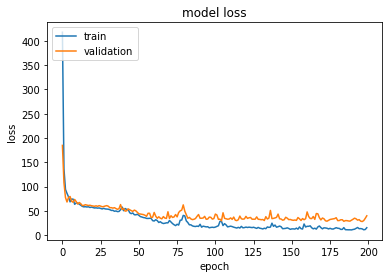

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
del model